In [293]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler,  PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

da=datasets.load_diabetes()
data_full = pd.DataFrame(da.data, columns= da.feature_names)
data_full['target'] = da.target

# Split the data into train and test sets
X = data_full.drop('target', axis=1)
y = data_full['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# IMPORTANT: Reset the index for X_train and y_train
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Create training dataframe (to maintain your workflow)
data = pd.concat([X_train, y_train], axis=1)

print(data.head())
print(f"\nTraining set size: {len(data)}")
print(f"Test set size: {len(X_test)}")

        age       sex       bmi        bp        s1        s2        s3  \
0  0.070769  0.050680  0.012117  0.056301  0.034206  0.049416 -0.039719   
1 -0.009147  0.050680 -0.018062 -0.033213 -0.020832  0.012152 -0.072854   
2  0.005383 -0.044642  0.049840  0.097615 -0.015328 -0.016345 -0.006584   
3 -0.027310 -0.044642 -0.035307 -0.029770 -0.056607 -0.058620  0.030232   
4 -0.023677 -0.044642 -0.065486 -0.081413 -0.038720 -0.053610  0.059685   

         s4        s5        s6  target  
0  0.034309  0.027364 -0.001078   144.0  
1  0.071210  0.000272  0.019633   150.0  
2 -0.002592  0.017036 -0.013504   280.0  
3 -0.039493 -0.049872 -0.129483   125.0  
4 -0.076395 -0.037129 -0.042499    59.0  

Training set size: 353
Test set size: 89


In [294]:
print(data.info())
data.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     353 non-null    float64
 1   sex     353 non-null    float64
 2   bmi     353 non-null    float64
 3   bp      353 non-null    float64
 4   s1      353 non-null    float64
 5   s2      353 non-null    float64
 6   s3      353 non-null    float64
 7   s4      353 non-null    float64
 8   s5      353 non-null    float64
 9   s6      353 non-null    float64
 10  target  353 non-null    float64
dtypes: float64(11)
memory usage: 30.5 KB
None


,count,mean,std,min,25%,50%,75%,max
age,353.0,0.001442,0.046334,-0.107226,-0.030942,0.009016,0.038076,0.110727
sex,353.0,0.000184,0.047644,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,353.0,0.001736,0.047275,-0.089197,-0.032073,-0.005128,0.032595,0.160855
bp,353.0,0.001179,0.048469,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,353.0,-0.000556,0.047786,-0.108893,-0.035968,-0.004321,0.025950,0.153914
s2,353.0,-0.000806,0.047631,-0.115613,-0.032629,-0.004132,0.027183,0.198788
s3,353.0,-0.000989,0.047044,-0.102307,-0.032356,-0.006584,0.026550,0.181179
s4,353.0,0.000377,0.047790,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,353.0,0.001216,0.047828,-0.126097,-0.033246,-0.000612,0.033654,0.133597
s6,353.0,0.001891,0.048380,-0.137767,-0.030072,0.003064,0.032059,0.135612


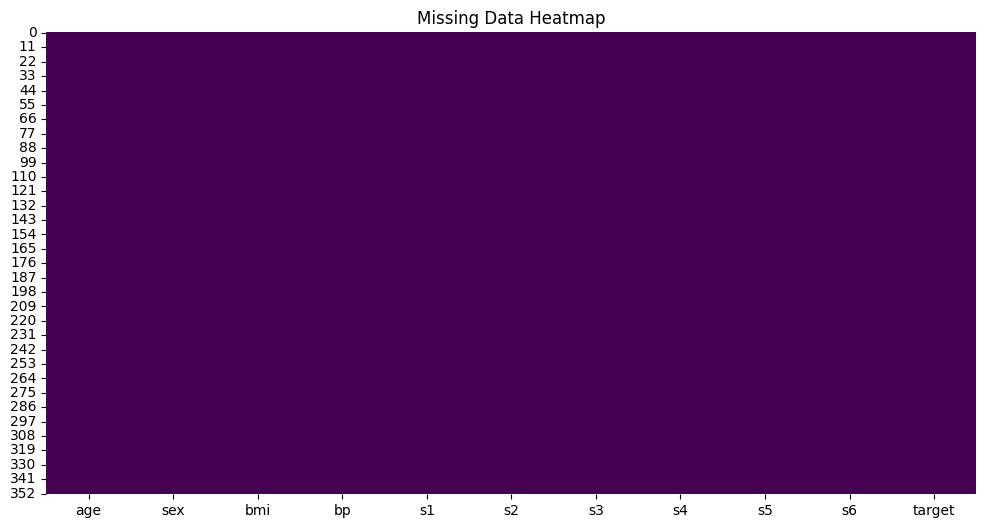

In [295]:
# Plot missing data heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

In [296]:
print(data.isnull().sum())
target_col = 'target'
X = data.drop(columns=[target_col])
y = data[target_col]

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


Anwer to question 1: 
------------------------------------------------------------------------------------------------------------------------------------------------------
442  entries are present. 10 fetures are there along with 1 target feature. The 's' values are the diffrent vitals of blood. It is a diabeties data set.
9 features are continous. Basically every feature is continuous except for sex which is categorical. Although it is represented by number, it is still catergorical.
------------------------------------------------------------------------------------------------------------------------------------------------------

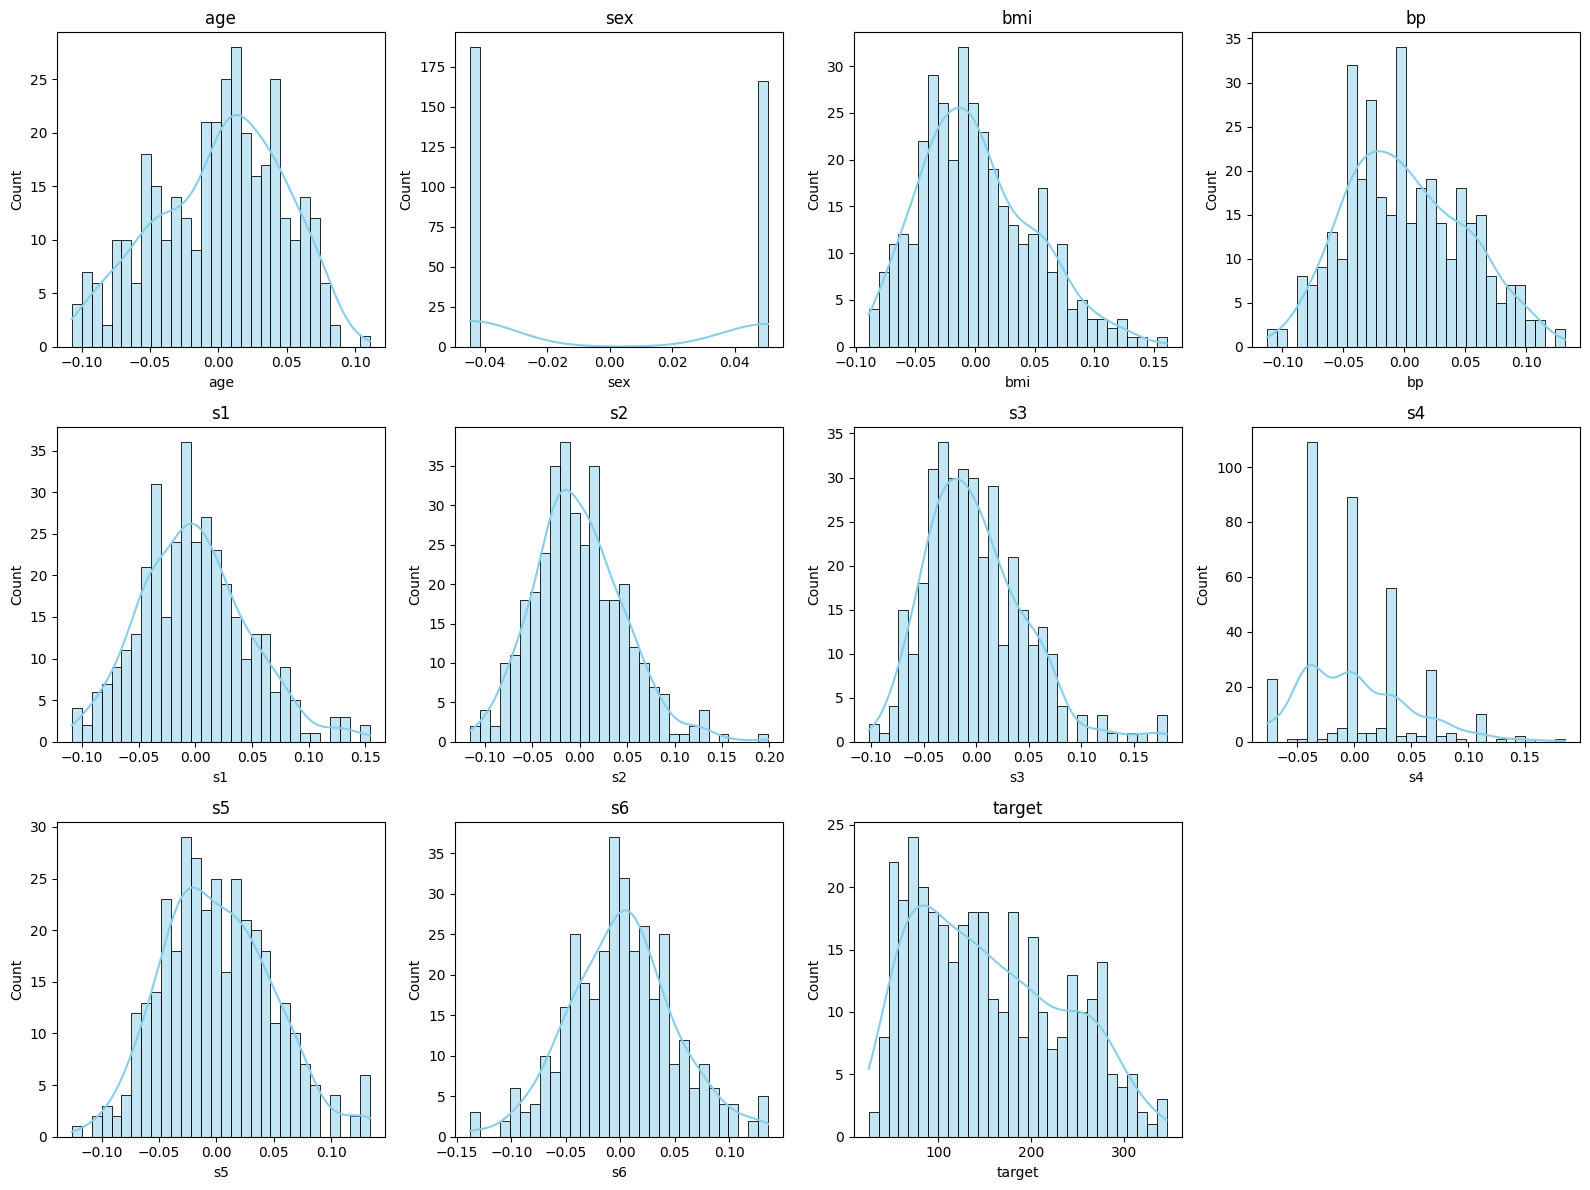

In [297]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(data.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data[col], kde=True, bins=30, color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()

Answer to B
--------------------------------------------------------------------------------------
age, bmi, bp, s1–s6 are roughly bell shaped (Some skewness (slight asymmetry) is visible in bmi, s3, s4, and s5)
Require Special Treatment for:
---------------------------------------------------------------------------------------
a) target  distribution is right-skewed. Log-transform can be used to stabilize variance. b) s4, s5 are mildly skewed.   c) sex can be converted to 0/1 since it is categorical.
-------------------------------------------------------------------------

In [298]:
corr_matrix = data.corr(method='pearson')
print(corr_matrix)

             age       sex       bmi        bp        s1        s2        s3  \
age     1.000000  0.171161  0.184695  0.314569  0.270283  0.218952 -0.043783   
sex     0.171161  1.000000  0.033934  0.179283  0.021069  0.120205 -0.355094   
bmi     0.184695  0.033934  1.000000  0.394309  0.266467  0.261560 -0.354655   
bp      0.314569  0.179283  0.394309  1.000000  0.239978  0.161457 -0.120827   
s1      0.270283  0.021069  0.266467  0.239978  1.000000  0.891063  0.053003   
s2      0.218952  0.120205  0.261560  0.161457  0.891063  1.000000 -0.190658   
s3     -0.043783 -0.355094 -0.354655 -0.120827  0.053003 -0.190658  1.000000   
s4      0.180038  0.320490  0.430974  0.212785  0.546840  0.654675 -0.736685   
s5      0.268422  0.113187  0.468473  0.375295  0.528543  0.307139 -0.372437   
s6      0.281806  0.165951  0.404928  0.374647  0.330773  0.293291 -0.288236   
target  0.196510  0.007116  0.604751  0.444770  0.199547  0.154922 -0.384000   

              s4        s5        s6   

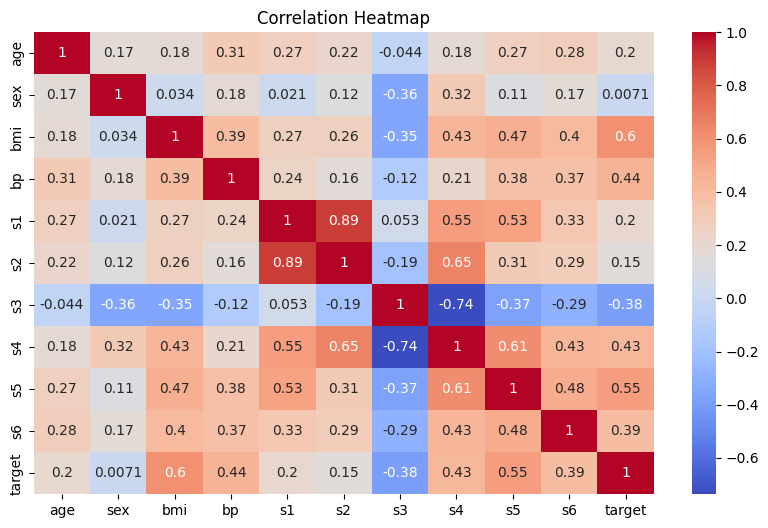

In [299]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

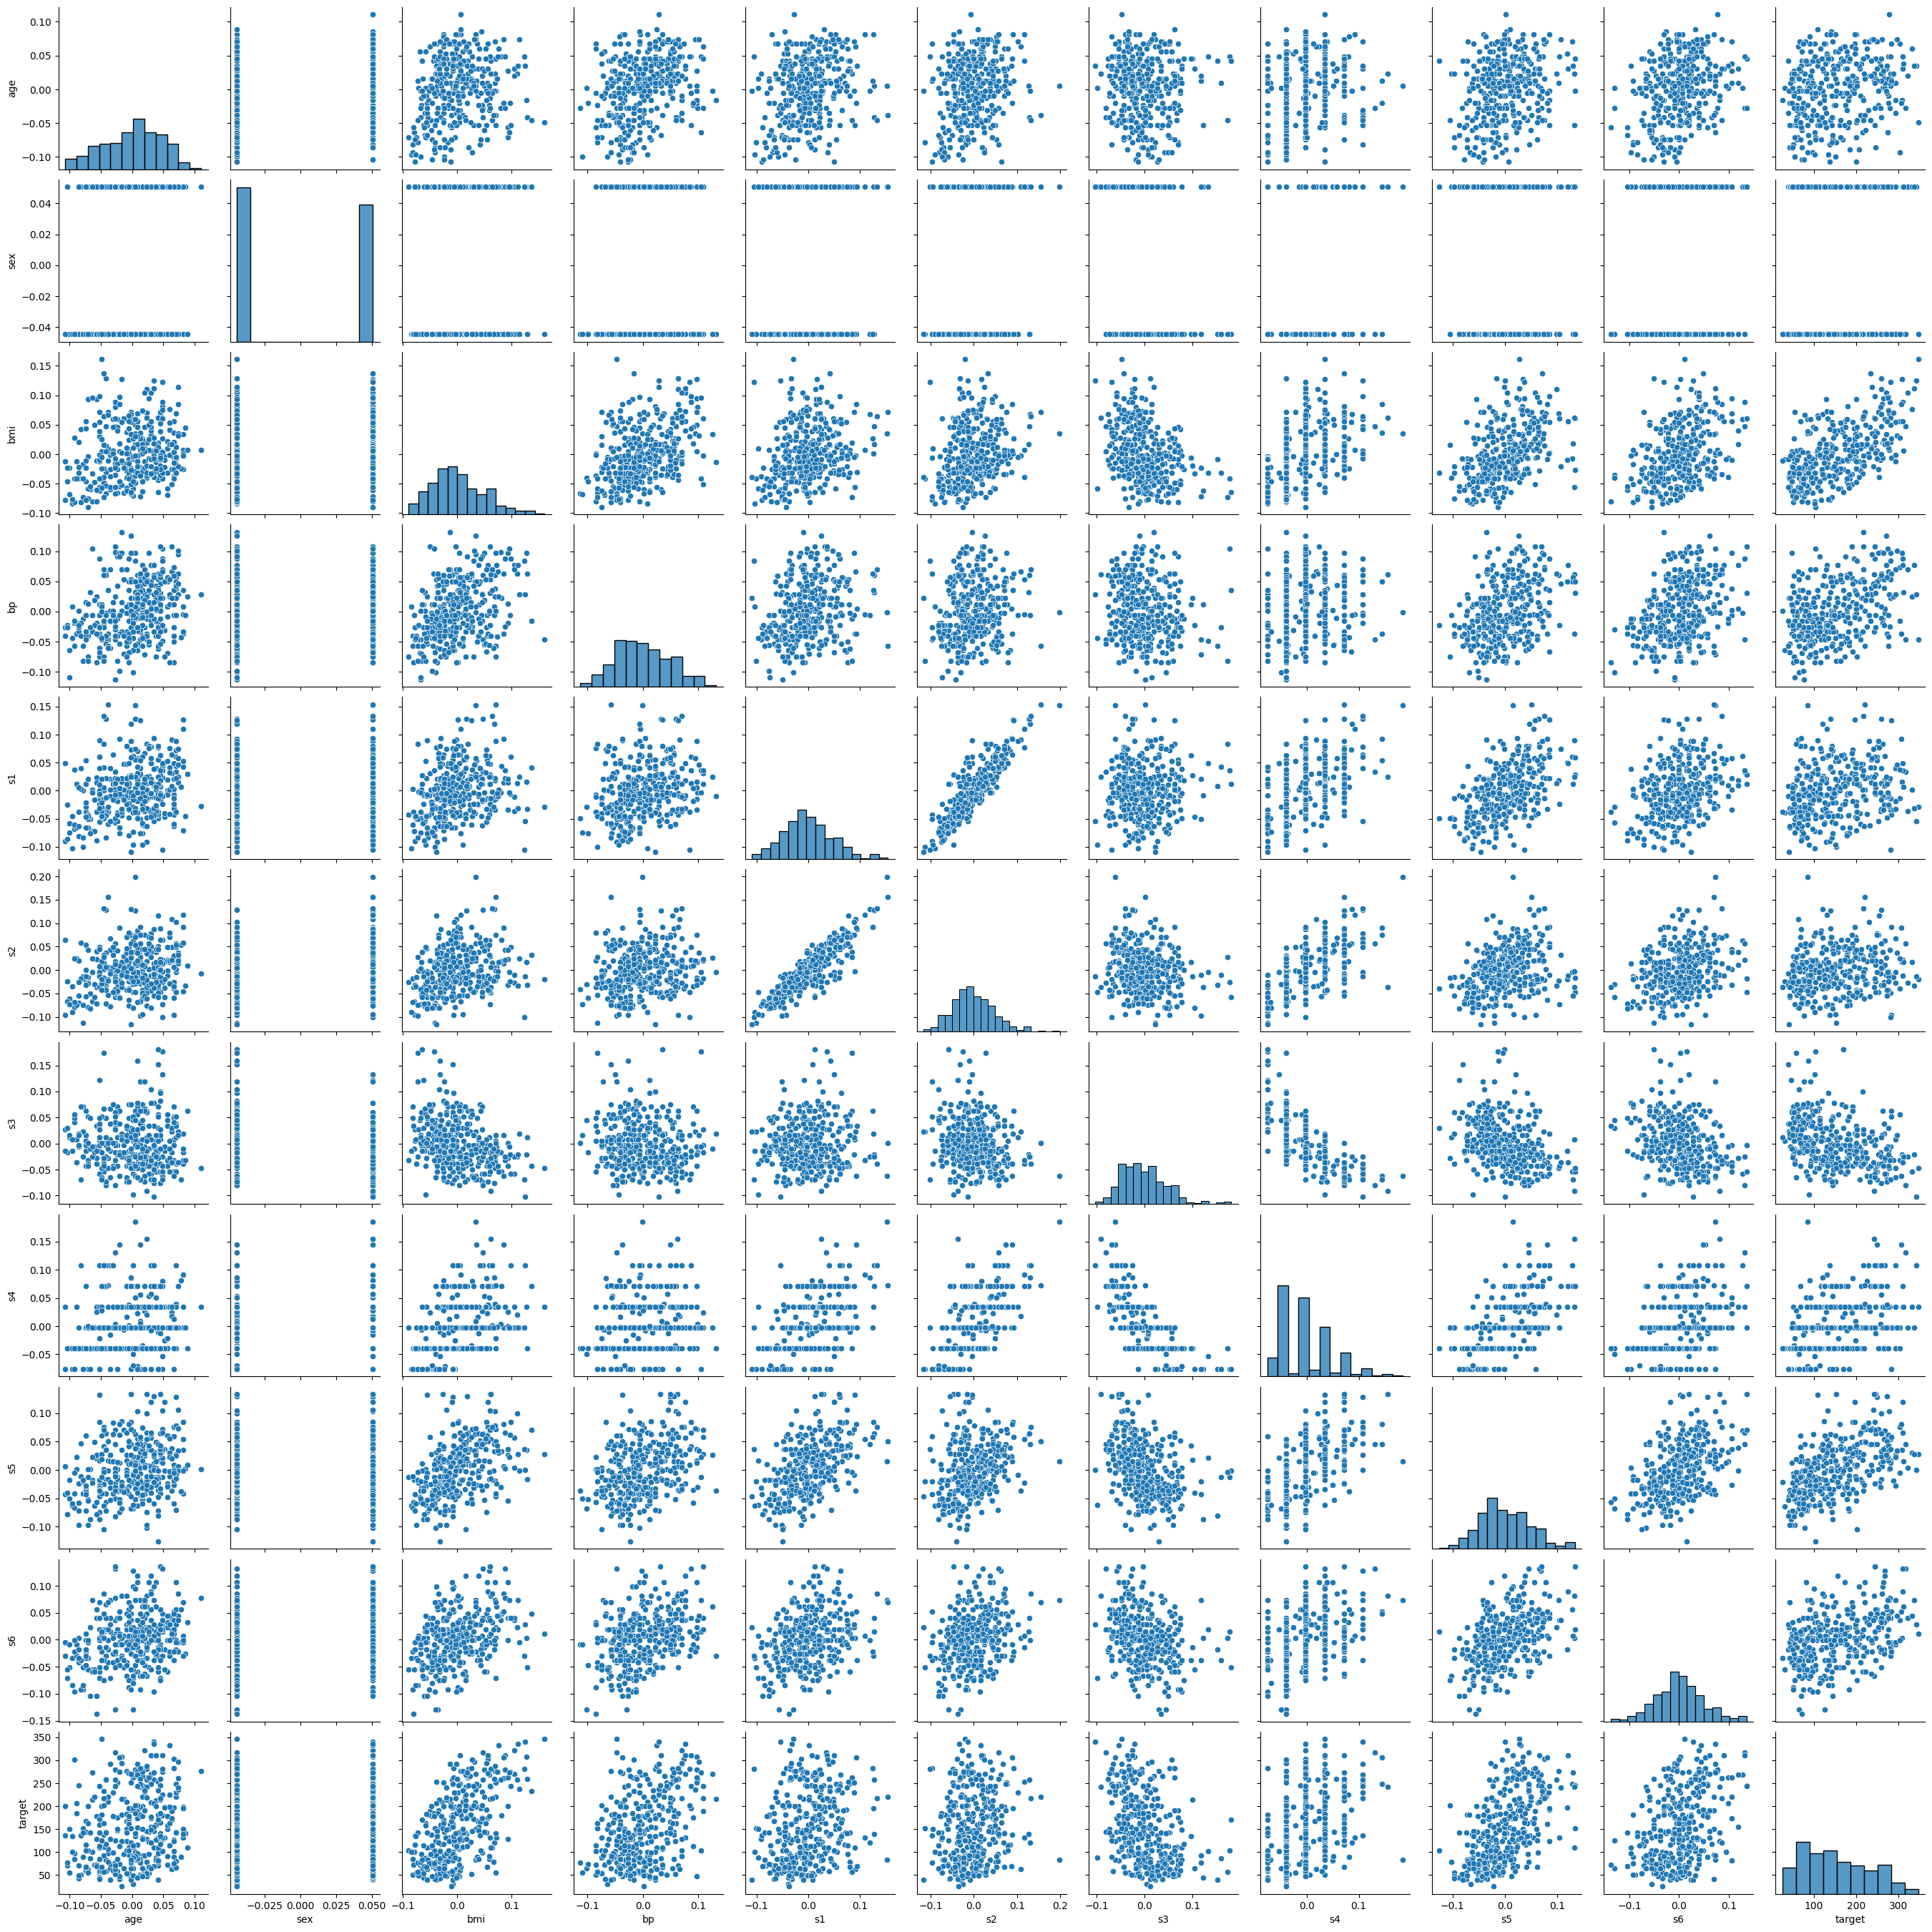

In [300]:
features = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target']


sns.pairplot(data[features])
plt.show()

Answer to C:
------------------------------------------------------------------------------------------------------------------------------------------------------
It is safe to say that cells corresponding to intese colours (reds and dark blue) have strong correlation between the corresponding features. But light colours like and grey and light orange colours cells have less correlation between the corresponding feature.
--------------------------
It can be said by looking at heatmap, PCC and scatter plot that : s3 vital is inversely co related to almost all the feature except age and s1.
--------------

In [301]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [302]:
target_col = 'target'
X = data.drop(columns=[target_col])
y = data[target_col]

No need of dropping rows with NAN value because this dataset doesn't have any such row unlike life ladder dataset

In [303]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [304]:
kfold = KFold(n_splits=4, shuffle=True, random_state=RANDOM_SEED)

print("\n" + "="*80)
print("PART 1: CLOSED-FORM SOLUTIONS")
print("="*80)


PART 1: CLOSED-FORM SOLUTIONS


In [305]:
print("\n1. Linear Regression (Normal Equation/SVD)")
lr_model = LinearRegression()
cv_scores = cross_val_score(lr_model, X_scaled, y, cv=kfold, 
                            scoring='neg_root_mean_squared_error')
cv_rmse = -cv_scores
print(f"   Cross-validation RMSE scores: {cv_rmse}")
print(f"   Mean CV RMSE: {cv_rmse.mean():.4f} (+/- {cv_rmse.std():.4f})")
lr_model.fit(X_scaled, y)
y_pred_lr = lr_model.predict(X_scaled)
train_rmse_lr = np.sqrt(mean_squared_error(y, y_pred_lr))
train_r2_lr = r2_score(y, y_pred_lr)
print(f"   Training RMSE: {train_rmse_lr:.4f}")
print(f"   Training R²: {train_r2_lr:.4f}")


1. Linear Regression (Normal Equation/SVD)
   Cross-validation RMSE scores: [51.19371398 57.96498923 53.29475138 59.72766068]
   Mean CV RMSE: 55.5453 (+/- 3.4405)
   Training RMSE: 53.5588
   Training R²: 0.5279


In [306]:
print("\n" + "="*80)
print("PART 2: SGD WITHOUT REGULARIZATION")
print("="*80)


PART 2: SGD WITHOUT REGULARIZATION


In [307]:
sgd_model = SGDRegressor(penalty=None, max_iter=1000, tol=1e-3, 
                         random_state=RANDOM_SEED, learning_rate='invscaling',
                         eta0=0.01)
cv_scores_sgd = cross_val_score(sgd_model, X_scaled, y, cv=kfold, 
                                scoring='neg_root_mean_squared_error')
cv_rmse_sgd = -cv_scores_sgd
print(f"   Cross-validation RMSE scores: {cv_rmse_sgd}")
print(f"   Mean CV RMSE: {cv_rmse_sgd.mean():.4f} (+/- {cv_rmse_sgd.std():.4f})")
sgd_model.fit(X_scaled, y)
y_pred_sgd = sgd_model.predict(X_scaled)
train_rmse_sgd = np.sqrt(mean_squared_error(y, y_pred_sgd))
train_r2_sgd = r2_score(y, y_pred_sgd)
print(f"   Training RMSE: {train_rmse_sgd:.4f}")
print(f"   Training R²: {train_r2_sgd:.4f}")


   Cross-validation RMSE scores: [51.27739093 58.08794752 53.41756536 59.92176953]
   Mean CV RMSE: 55.6762 (+/- 3.4746)
   Training RMSE: 53.8117
   Training R²: 0.5235


Closed form solution is slightly better than SGD solution.
-----

In [308]:
print("\n" + "="*80)
print("PART 3: REGULARIZATION EXPERIMENTS")
print("="*80)


PART 3: REGULARIZATION EXPERIMENTS


In [309]:
print("\n3. Ridge Regularization (L2)")
alpha_values = [0.000001,0.001,0.002,0.0785,0.005, 0.01, 1.0,10,5,2.5,7.5, 100.0]
ridge_results = {}

for alpha in alpha_values:
    sgd_ridge = SGDRegressor(penalty='l2', alpha=alpha, max_iter=1000, 
                             tol=1e-3, random_state=RANDOM_SEED, 
                             learning_rate='invscaling', eta0=0.01)
    cv_scores = cross_val_score(sgd_ridge, X_scaled, y, cv=kfold, 
                                scoring='neg_root_mean_squared_error')
    cv_rmse = -cv_scores
    ridge_results[alpha] = cv_rmse.mean()
    print(f"   Alpha={alpha:6.6f}: CV RMSE = {cv_rmse.mean():.4f} (+/- {cv_rmse.std():.4f})")


3. Ridge Regularization (L2)
   Alpha=0.000001: CV RMSE = 55.6762 (+/- 3.4746)
   Alpha=0.001000: CV RMSE = 55.6734 (+/- 3.4718)
   Alpha=0.002000: CV RMSE = 55.6708 (+/- 3.4689)
   Alpha=0.078500: CV RMSE = 55.5149 (+/- 3.2961)
   Alpha=0.005000: CV RMSE = 55.6629 (+/- 3.4606)
   Alpha=0.010000: CV RMSE = 55.6506 (+/- 3.4475)
   Alpha=1.000000: CV RMSE = 58.1993 (+/- 3.8402)
   Alpha=10.000000: CV RMSE = 70.7116 (+/- 4.7789)
   Alpha=5.000000: CV RMSE = 66.7842 (+/- 4.8095)
   Alpha=2.500000: CV RMSE = 62.5415 (+/- 4.5000)
   Alpha=7.500000: CV RMSE = 69.0737 (+/- 4.7409)
   Alpha=100.000000: CV RMSE = 77.3578 (+/- 4.5560)


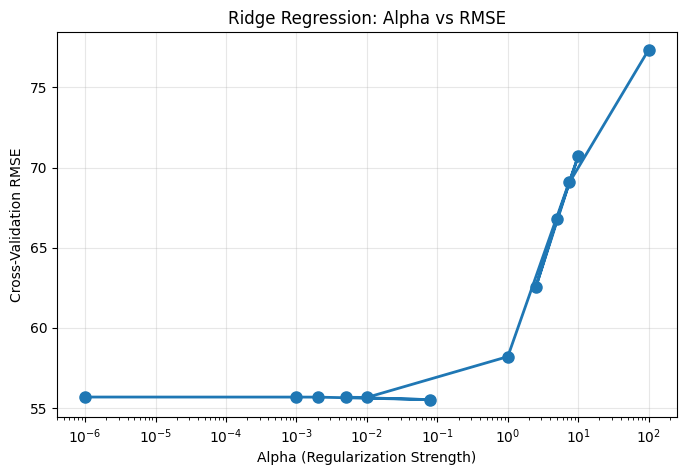


Best alpha: 0.0785 with RMSE: 55.5149


In [310]:
# Consider these enhancements:

# 1. Visualize the results
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
alphas = list(ridge_results.keys())
rmses = list(ridge_results.values())
plt.semilogx(alphas, rmses, 'o-', linewidth=2, markersize=8)
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Cross-Validation RMSE')
plt.title('Ridge Regression: Alpha vs RMSE')
plt.grid(True, alpha=0.3)
plt.show()

# 2. Find the best alpha
best_alpha = min(ridge_results, key=ridge_results.get)
print(f"\nBest alpha: {best_alpha} with RMSE: {ridge_results[best_alpha]:.4f}")


In [311]:
print("\n4. Lasso Regularization (L1)")
lasso_results = {}

for alpha in alpha_values:
    sgd_lasso = SGDRegressor(penalty='l1', alpha=alpha, max_iter=1000, 
                             tol=1e-3, random_state=RANDOM_SEED,
                             learning_rate='invscaling', eta0=0.01)
    cv_scores = cross_val_score(sgd_lasso, X_scaled, y, cv=kfold, 
                                scoring='neg_root_mean_squared_error')
    cv_rmse = -cv_scores
    lasso_results[alpha] = cv_rmse.mean()
    print(f"   Alpha={alpha:6.6f}: CV RMSE = {cv_rmse.mean():.4f} (+/- {cv_rmse.std():.4f})")
# 2. Find the best alpha
best_alpha = min(lasso_results, key=lasso_results.get)
print(f"\nBest alpha: {best_alpha} with RMSE: {lasso_results[best_alpha]:.4f}")

print("\n   Impact: Lasso performs feature selection by shrinking some coefficients to zero.")
print("           Higher alpha leads to sparser models with fewer non-zero coefficients.")


4. Lasso Regularization (L1)
   Alpha=0.000001: CV RMSE = 55.6762 (+/- 3.4746)
   Alpha=0.001000: CV RMSE = 55.6761 (+/- 3.4744)
   Alpha=0.002000: CV RMSE = 55.6760 (+/- 3.4742)
   Alpha=0.078500: CV RMSE = 55.6686 (+/- 3.4560)
   Alpha=0.005000: CV RMSE = 55.6758 (+/- 3.4735)
   Alpha=0.010000: CV RMSE = 55.6754 (+/- 3.4724)
   Alpha=1.000000: CV RMSE = 55.4588 (+/- 3.1612)
   Alpha=10.000000: CV RMSE = 57.7320 (+/- 3.5539)
   Alpha=5.000000: CV RMSE = 56.2683 (+/- 3.2116)
   Alpha=2.500000: CV RMSE = 55.7291 (+/- 3.1760)
   Alpha=7.500000: CV RMSE = 56.9293 (+/- 3.3193)
   Alpha=100.000000: CV RMSE = 78.1474 (+/- 4.4213)

Best alpha: 1.0 with RMSE: 55.4588

   Impact: Lasso performs feature selection by shrinking some coefficients to zero.
           Higher alpha leads to sparser models with fewer non-zero coefficients.


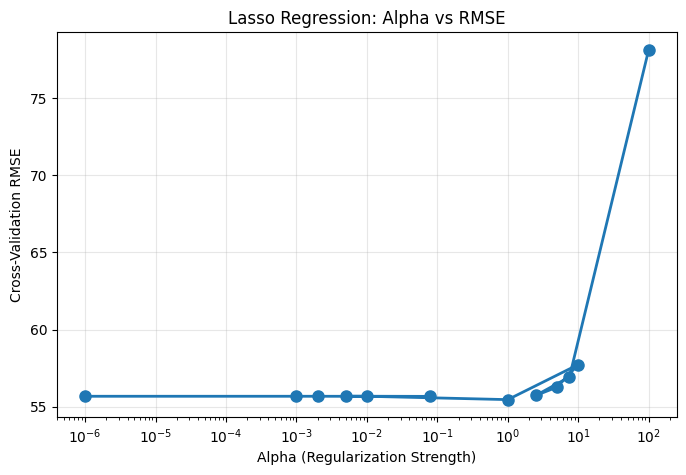

In [312]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
alphas = list(lasso_results.keys())
rmses = list(lasso_results.values())
plt.semilogx(alphas, rmses, 'o-', linewidth=2, markersize=8)
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Cross-Validation RMSE')
plt.title('Lasso Regression: Alpha vs RMSE')
plt.grid(True, alpha=0.3)
plt.show()

In [313]:
print("\n5. Elastic Net Regularization (L1 + L2, l1_ratio=0.5)")
elasticnet_results = {}

for alpha in alpha_values:
    sgd_elastic = SGDRegressor(penalty='elasticnet', alpha=alpha, l1_ratio=0.5,
                               max_iter=1000, tol=1e-3, random_state=RANDOM_SEED,
                               learning_rate='invscaling', eta0=0.01)
    cv_scores = cross_val_score(sgd_elastic, X_scaled, y, cv=kfold, 
                                scoring='neg_root_mean_squared_error')
    cv_rmse = -cv_scores
    elasticnet_results[alpha] = cv_rmse.mean()
    print(f"   Alpha={alpha:6.4f}: CV RMSE = {cv_rmse.mean():.4f} (+/- {cv_rmse.std():.4f})")
best_alpha = min(elasticnet_results, key=elasticnet_results.get)
print(f"\nBest alpha: {best_alpha} with RMSE: {elasticnet_results[best_alpha]:.4f}")

print("\n   Impact: Elastic Net combines L1 and L2, balancing feature selection and")
print("           coefficient shrinkage. l1_ratio controls the mix (0=Ridge, 1=Lasso).")



5. Elastic Net Regularization (L1 + L2, l1_ratio=0.5)
   Alpha=0.0000: CV RMSE = 55.6762 (+/- 3.4746)
   Alpha=0.0010: CV RMSE = 55.6748 (+/- 3.4731)
   Alpha=0.0020: CV RMSE = 55.6734 (+/- 3.4715)
   Alpha=0.0785: CV RMSE = 55.5839 (+/- 3.3713)
   Alpha=0.0050: CV RMSE = 55.6693 (+/- 3.4670)
   Alpha=0.0100: CV RMSE = 55.6626 (+/- 3.4596)
   Alpha=1.0000: CV RMSE = 56.6602 (+/- 3.5467)
   Alpha=10.0000: CV RMSE = 68.2516 (+/- 4.8588)
   Alpha=5.0000: CV RMSE = 63.2462 (+/- 4.6065)
   Alpha=2.5000: CV RMSE = 59.4866 (+/- 3.9754)
   Alpha=7.5000: CV RMSE = 66.2023 (+/- 4.7148)
   Alpha=100.0000: CV RMSE = 78.1461 (+/- 4.4231)

Best alpha: 0.0785 with RMSE: 55.5839

   Impact: Elastic Net combines L1 and L2, balancing feature selection and
           coefficient shrinkage. l1_ratio controls the mix (0=Ridge, 1=Lasso).


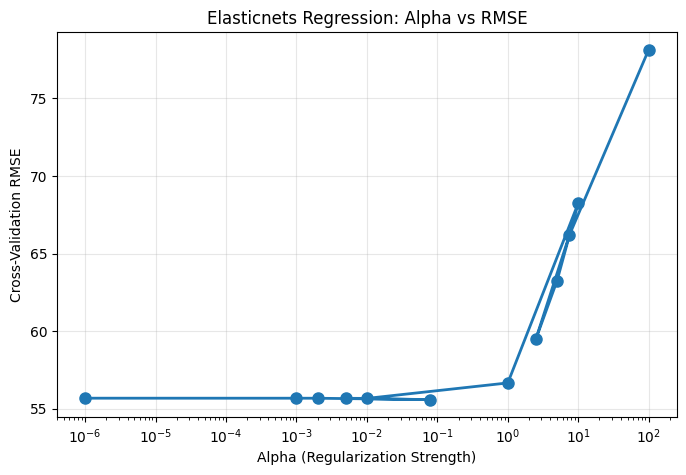

In [314]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
alphas = list(elasticnet_results.keys())
rmses = list(elasticnet_results.values())
plt.semilogx(alphas, rmses, 'o-', linewidth=2, markersize=8)
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Cross-Validation RMSE')
plt.title('Elasticnets Regression: Alpha vs RMSE')
plt.grid(True, alpha=0.3)
plt.show()

In [315]:
print("\n" + "="*80)
print("PART 4: HYPERPARAMETER EXPLORATION - No. of Epochs")
print("="*80)


PART 4: HYPERPARAMETER EXPLORATION - No. of Epochs


In [316]:
# Tuning Number of Epochs
epochs = [5,8,10,12,18,25,50,100, 500, 1000, 2000, 5000]
epoch_results = {}
for epoch in epochs:
    sgd_epoch = SGDRegressor(penalty='l2', alpha=1.0, max_iter=epoch, tol=1e-3,
                             random_state=RANDOM_SEED, learning_rate='constant', 
                             eta0=0.01)
    cv_scores = cross_val_score(sgd_epoch, X_scaled, y, cv=kfold, 
                                scoring='neg_root_mean_squared_error')
    cv_rmse = -cv_scores
    epoch_results[epoch] = cv_rmse.mean()
    print(f"   Epochs={epoch:5d}: CV RMSE = {cv_rmse.mean():.4f} (+/- {cv_rmse.std():.4f})")
print("\n   Impact: More epochs allow the model more iterations to converge.")
print("           Too few epochs may underfit, while too many may waste computation time.")
print("           (Note: Early stopping via 'tol' parameter may halt training before max_iter)")

   Epochs=    5: CV RMSE = 58.8950 (+/- 4.8346)
   Epochs=    8: CV RMSE = 59.4942 (+/- 2.6377)
   Epochs=   10: CV RMSE = 58.1815 (+/- 2.6953)
   Epochs=   12: CV RMSE = 59.8705 (+/- 3.7851)
   Epochs=   18: CV RMSE = 60.3674 (+/- 4.3140)
   Epochs=   25: CV RMSE = 59.7525 (+/- 3.4992)
   Epochs=   50: CV RMSE = 59.7525 (+/- 3.4992)
   Epochs=  100: CV RMSE = 59.7525 (+/- 3.4992)
   Epochs=  500: CV RMSE = 59.7525 (+/- 3.4992)
   Epochs= 1000: CV RMSE = 59.7525 (+/- 3.4992)
   Epochs= 2000: CV RMSE = 59.7525 (+/- 3.4992)
   Epochs= 5000: CV RMSE = 59.7525 (+/- 3.4992)

   Impact: More epochs allow the model more iterations to converge.
           Too few epochs may underfit, while too many may waste computation time.
           (Note: Early stopping via 'tol' parameter may halt training before max_iter)


From Epochs = 8 → 10, the CV RMSE decreases slightly , which suggests  model is still learning and improving.
-
Beyond Epoch = 10, there is no consistent improvement. In fact, at 18 and 25, the RMSE fluctuates slightly, and after 25, it plateaus completely .
-
That plateau means the model has converged — increasing epochs doesn’t lead to better generalization, and  only adds computational cost or potential overfitting risk.
-

In [317]:
print("\n" + "="*80)
print("PART 5: SUMMARY AND BEST MODEL SELECTION")
print("="*80)


PART 5: SUMMARY AND BEST MODEL SELECTION


In [318]:
all_results = {
    'Linear Regression': 55.5334,
    'SGD (no reg)': cv_rmse_sgd.mean(),
}

for alpha in alpha_values:
    all_results[f'Ridge (α={alpha})'] = ridge_results[alpha]
    all_results[f'Lasso (α={alpha})'] = lasso_results[alpha]
    all_results[f'ElasticNet (α={alpha})'] = elasticnet_results[alpha]

print("\nAll Model Performance (CV RMSE):")
for model_name, rmse in sorted(all_results.items(), key=lambda x: x[1]):
    print(f"   {model_name:30s}: {rmse:.4f}")


All Model Performance (CV RMSE):
   Lasso (α=1.0)                 : 55.4588
   Ridge (α=0.0785)              : 55.5149
   Linear Regression             : 55.5334
   ElasticNet (α=0.0785)         : 55.5839
   Ridge (α=0.01)                : 55.6506
   ElasticNet (α=0.01)           : 55.6626
   Ridge (α=0.005)               : 55.6629
   Lasso (α=0.0785)              : 55.6686
   ElasticNet (α=0.005)          : 55.6693
   Ridge (α=0.002)               : 55.6708
   ElasticNet (α=0.002)          : 55.6734
   Ridge (α=0.001)               : 55.6734
   ElasticNet (α=0.001)          : 55.6748
   Lasso (α=0.01)                : 55.6754
   Lasso (α=0.005)               : 55.6758
   Lasso (α=0.002)               : 55.6760
   Lasso (α=0.001)               : 55.6761
   Ridge (α=1e-06)               : 55.6762
   ElasticNet (α=1e-06)          : 55.6762
   Lasso (α=1e-06)               : 55.6762
   SGD (no reg)                  : 55.6762
   Lasso (α=2.5)                 : 55.7291
   Lasso (α=5)      

In [319]:
# best-performing regularization set of hyperparameters:
# Lasso with aplha as 2.5 and no of epochs as 12

Lasso with aplha as 1.0 and no of epochs as 10
Epoch 1: Train RMSE = 84.5577, Validation RMSE = 95.0478
Epoch 2: Train RMSE = 61.8805, Validation RMSE = 66.4174
Epoch 3: Train RMSE = 56.6199, Validation RMSE = 56.7203
Epoch 4: Train RMSE = 55.4587, Validation RMSE = 53.3845
Epoch 5: Train RMSE = 55.1731, Validation RMSE = 52.1328
Epoch 6: Train RMSE = 55.0883, Validation RMSE = 51.6191
Epoch 7: Train RMSE = 55.0577, Validation RMSE = 51.3942
Epoch 8: Train RMSE = 55.0446, Validation RMSE = 51.2913
Epoch 9: Train RMSE = 55.0383, Validation RMSE = 51.2428
Epoch 10: Train RMSE = 55.0347, Validation RMSE = 51.2194


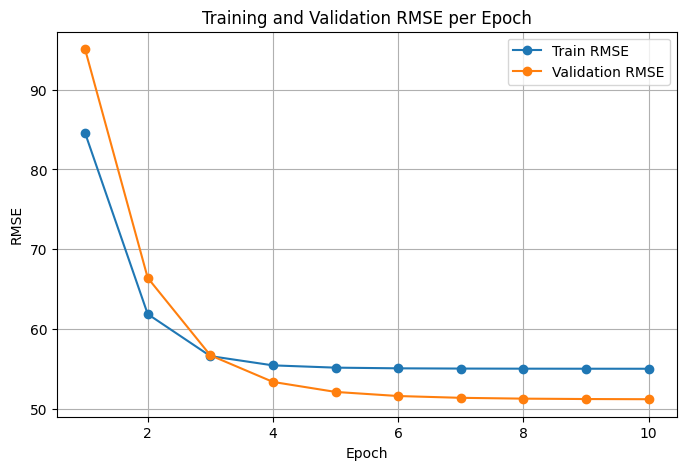

In [320]:
print( "Lasso with aplha as 1.0 and no of epochs as 10")
np.random.seed(RANDOM_SEED)

# Parameters
alpha = 1.0
epochs = 10

# Initialize SGDRegressor for Lasso with warm_start=True
sgd_lasso = SGDRegressor(
    penalty='l1',
    alpha=alpha,
    max_iter=1,          # 1 epoch per fit
    tol=None,            # disable early stopping
    learning_rate='invscaling',
    eta0=0.01,
    warm_start=True,     # keep previous state
    random_state=RANDOM_SEED
)

# Prepare train/validation split for monitoring
kf = KFold(n_splits=4, shuffle=True, random_state=RANDOM_SEED)
train_rmse_epochs = []
val_rmse_epochs = []

# We'll use the first split for plotting per-epoch RMSE
train_index, val_index = next(kf.split(X_scaled))
X_train, X_val = X_scaled[train_index], X_scaled[val_index]

y_array = y.to_numpy()
y_train, y_val = y_array[train_index], y_array[val_index]

y_train, y_val = y[train_index], y[val_index]

for epoch in range(1, epochs + 1):
    # Train for 1 epoch
    sgd_lasso.fit(X_train, y_train)
    
    # Predict on train and validation sets
    y_train_pred = sgd_lasso.predict(X_train)
    y_val_pred = sgd_lasso.predict(X_val)
    
    # Compute RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    
    # Store
    train_rmse_epochs.append(train_rmse)
    val_rmse_epochs.append(val_rmse)
    
    print(f"Epoch {epoch}: Train RMSE = {train_rmse:.4f}, Validation RMSE = {val_rmse:.4f}")

# Plot the RMSE per epoch
plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs + 1), train_rmse_epochs, marker='o', label='Train RMSE')
plt.plot(range(1, epochs + 1), val_rmse_epochs, marker='o', label='Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Training and Validation RMSE per Epoch')
plt.legend()
plt.grid(True)
plt.show()

In [321]:
# Evaluate final model on full training set
y_pred_full = sgd_lasso.predict(X_scaled)
final_rmse = np.sqrt(mean_squared_error(y, y_pred_full))
final_r2 = r2_score(y, y_pred_full)
final_mae = mean_absolute_error(y, y_pred_full)

print(f"\nFinal Model Performance on Full Training Set:")
print(f"   RMSE: {final_rmse:.4f}")
print(f"   R²:   {final_r2:.4f}")
print(f"   MAE:  {final_mae:.4f}")

print("\n" + "="*80)
print("PART 7: VISUALIZATIONS")
print("="*80)



Final Model Performance on Full Training Set:
   RMSE: 54.0981
   R²:   0.5184
   MAE:  43.8731

PART 7: VISUALIZATIONS


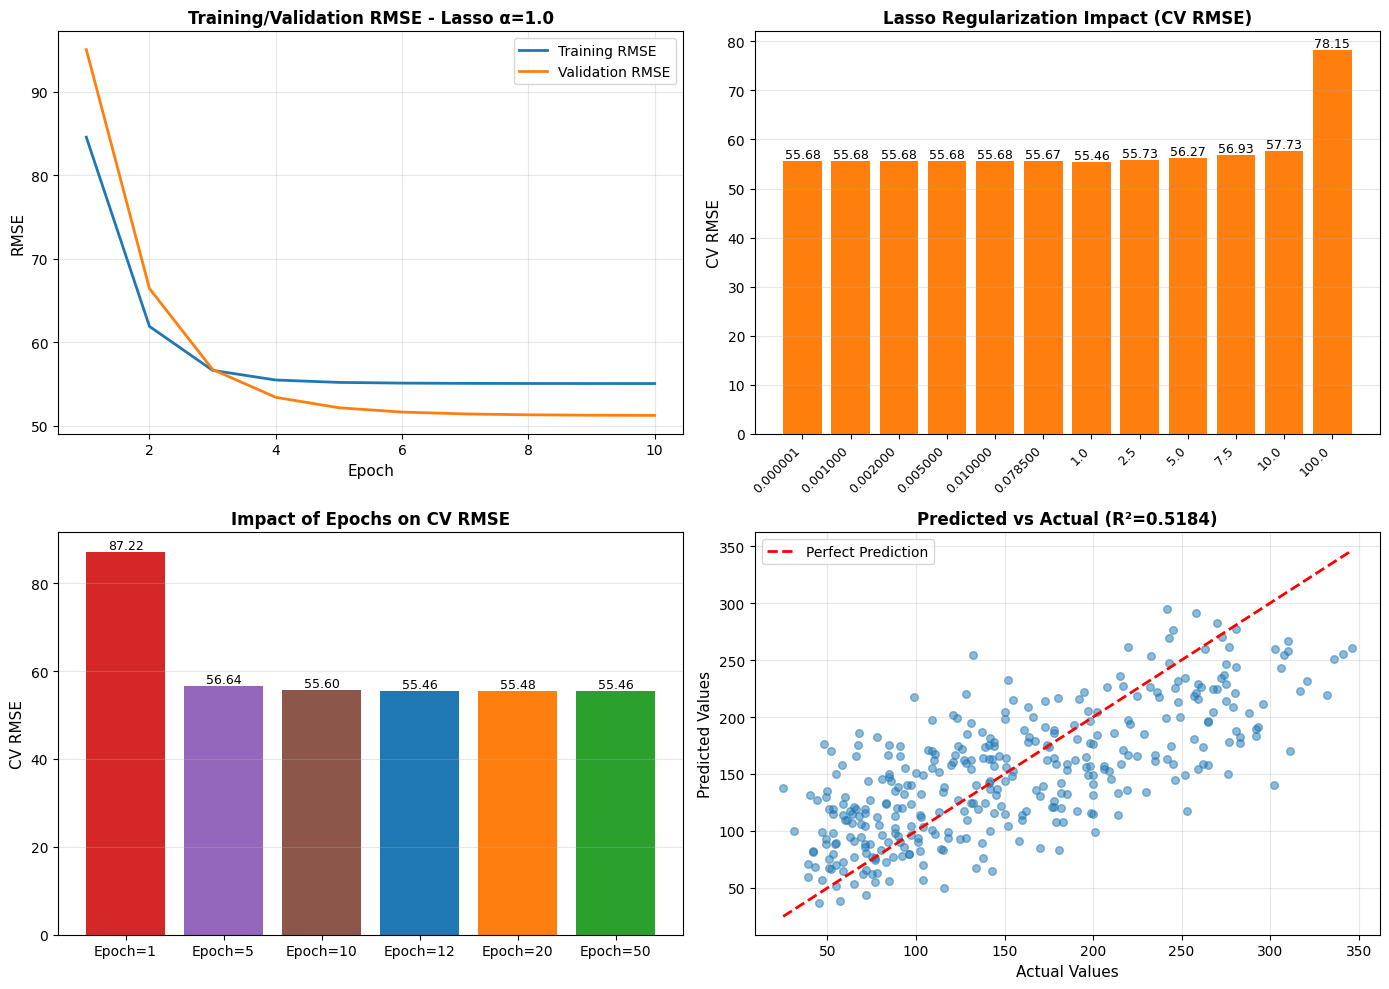

In [322]:
import matplotlib.pyplot as plt


n_epochs = epochs
train_losses = train_rmse_epochs
val_losses = val_rmse_epochs
y_pred_final = sgd_lasso.predict(X_scaled)
final_r2_val = r2_score(y, y_pred_final)
best_model_name = f"Lasso α={alpha}"

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Training and Validation RMSE over Epochs
ax1 = axes[0, 0]
ax1.plot(range(1, n_epochs + 1), train_losses, label='Training RMSE', linewidth=2)
ax1.plot(range(1, n_epochs + 1), val_losses, label='Validation RMSE', linewidth=2)
ax1.set_xlabel('Epoch', fontsize=11)
ax1.set_ylabel('RMSE', fontsize=11)
ax1.set_title(f'Training/Validation RMSE - {best_model_name}', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Lasso α Impact on CV RMSE
sorted_alphas = sorted(lasso_results.keys())
sorted_rmse = [lasso_results[a] for a in sorted_alphas]

# Plot 2: Lasso α Impact on CV RMSE
ax2 = axes[0, 1]
bars = ax2.bar([f'{a:.6f}' if a < 1 else f'{a:.1f}' for a in sorted_alphas], 
               sorted_rmse, color='#ff7f0e')
ax2.set_xticks(range(len(sorted_alphas)))
ax2.set_xticklabels([f'{a:.6f}' if a < 1 else f'{a:.1f}' for a in sorted_alphas], 
                    rotation=45, ha='right', fontsize=9)
ax2.set_ylabel('CV RMSE', fontsize=11)
ax2.set_title('Lasso Regularization Impact (CV RMSE)', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

# Annotate bars with RMSE values
for i, rmse in enumerate(sorted_rmse):
    ax2.text(i, rmse, f'{rmse:.2f}', ha='center', va='bottom', fontsize=9)

# Plot 3: Epoch Impact (if you experimented with eta0)
epoch_values = [1, 5, 10, 12, 20, 50]
epoch_results = {}

for e in epoch_values:
    sgd_lasso_epoch = SGDRegressor(
        penalty='l1',
        alpha=alpha,
        max_iter=e,
        tol=1e-3,
        random_state=RANDOM_SEED,
        learning_rate='invscaling',
        eta0=0.01
    )
    # CV RMSE
    cv_scores = cross_val_score(sgd_lasso_epoch, X_scaled, y, cv=kfold,
                                scoring='neg_root_mean_squared_error')
    cv_rmse = -cv_scores
    epoch_results[e] = cv_rmse.mean()

# Plot 3: Epochs Impact
ax3 = axes[1, 0]
epochs_names = [f'Epoch={ep}' for ep in epoch_values]
bars = ax3.bar(epochs_names, [epoch_results[ep] for ep in epoch_values],
               color=['#d62728', '#9467bd', '#8c564b', '#1f77b4', '#ff7f0e', '#2ca02c'])
ax3.set_ylabel('CV RMSE', fontsize=11)
ax3.set_title('Impact of Epochs on CV RMSE', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='y')
for i, ep in enumerate(epoch_values):
    ax3.text(i, epoch_results[ep], f'{epoch_results[ep]:.2f}', ha='center', va='bottom', fontsize=9)

# Plot 4: Predicted vs Actual
ax4 = axes[1, 1]
ax4.scatter(y, y_pred_final, alpha=0.5, s=30)
min_val = min(y.min(), y_pred_final.min())
max_val = max(y.max(), y_pred_final.max())
ax4.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
ax4.set_xlabel('Actual Values', fontsize=11)
ax4.set_ylabel('Predicted Values', fontsize=11)
ax4.set_title(f'Predicted vs Actual (R²={final_r2_val:.4f})', fontsize=12, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('sgd_lasso_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


Solution D Starts:
-


In [ ]:
print("\n" + "="*80)
print("1. Polynomial regression and using SGD")
print("="*80)


In [324]:
degrees = [1, 2, 3, 4, 5,10]
degree_results = {}

print("\nTesting polynomial degrees [1, 2, 3, 4, 5]...")
print("-" * 80)

for degree in degrees:
    print(f"\nDegree {degree}:")
    
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_val = poly.transform(X_val)
    
    # Standardize
    scaler = StandardScaler()
    X_poly_train_scaled = scaler.fit_transform(X_poly_train)
    X_poly_val_scaled = scaler.transform(X_poly_val)
    
    print(f"  Number of polynomial features: {X_poly_train_scaled.shape[1]}")
    
    # Train SGD model
    sgd_model = SGDRegressor(
        penalty='l2', alpha=1.0, max_iter=10, tol=1e-3,
        random_state=RANDOM_SEED, learning_rate='invscaling', eta0=0.01
    )
    sgd_model.fit(X_poly_train_scaled, y_train)
    
    # Predictions
    y_train_pred = sgd_model.predict(X_poly_train_scaled)
    y_val_pred = sgd_model.predict(X_poly_val_scaled)
    
    # Metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    val_r2 = r2_score(y_val, y_val_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    degree_results[degree] = {
        'train_rmse': train_rmse,
        'val_rmse': val_rmse,
        'train_r2': train_r2,
        'val_r2': val_r2,
        'n_features': X_poly_train_scaled.shape[1]
    }



Testing polynomial degrees [1, 2, 3, 4, 5]...
--------------------------------------------------------------------------------

Degree 1:
  Number of polynomial features: 10

Degree 2:
  Number of polynomial features: 65

Degree 3:
  Number of polynomial features: 285

Degree 4:
  Number of polynomial features: 1000

Degree 5:
  Number of polynomial features: 3002

Degree 10:
  Number of polynomial features: 184755


In [325]:
print("\n" + "="*80)
print("2. OVERFITTING/UNDERFITTING ANALYSIS")
print("="*80)



2. OVERFITTING/UNDERFITTING ANALYSIS


In [326]:
print("\nAnalyzing model fit based on train-validation gap:\n")
for degree, metrics in degree_results.items():
    gap = metrics['val_rmse'] - metrics['train_rmse']
    gap_pct = (gap / metrics['train_rmse']) * 100
    
    print(f"Degree {degree}:")
    print(f"  Train RMSE: {metrics['train_rmse']:.4f}")
    print(f"  Train RMSE: {metrics['train_rmse']:.4f}")
    print(f"  Val RMSE:   {metrics['val_rmse']:.4f}")
    print(f"  Gap:        {gap:.4f} ({gap_pct:.1f}%)")

    
    


Analyzing model fit based on train-validation gap:

Degree 1:
  Train RMSE: 58.6706
  Train RMSE: 58.6706
  Val RMSE:   54.5004
  Gap:        -4.1702 (-7.1%)
Degree 2:
  Train RMSE: 55.1880
  Train RMSE: 55.1880
  Val RMSE:   55.6258
  Gap:        0.4378 (0.8%)
Degree 3:
  Train RMSE: 23181.2684
  Train RMSE: 23181.2684
  Val RMSE:   15780.7891
  Gap:        -7400.4793 (-31.9%)
Degree 4:
  Train RMSE: 1668743690030.5706
  Train RMSE: 1668743690030.5706
  Val RMSE:   1064532228444.5446
  Gap:        -604211461586.0260 (-36.2%)
Degree 5:
  Train RMSE: 5809224680561.1582
  Train RMSE: 5809224680561.1582
  Val RMSE:   4712246682594.3486
  Gap:        -1096977997966.8096 (-18.9%)
Degree 10:
  Train RMSE: 734562904076079.3750
  Train RMSE: 734562904076079.3750
  Val RMSE:   350886631502174.2500
  Gap:        -383676272573905.1250 (-52.2%)


Degree 2 polynomial is optimal model here. The higher results are  meaningless noise.
validation error is lower than training error, which is impossible in normal circumstances.


looking at the results we can say that  Linear Regression model is better than polynomial.

Answer E starts here:
-

Final model is Linear regression along with with Lasso regularization, alpha as 1 and epochs as 10.


In [234]:


print("\n" + "="*80)
print("9. TEST SET PREDICTIONS")
print("="*80)


9. TEST SET PREDICTIONS


In [332]:
# Create a NEW scaler with a different name to avoid conflicts
scaler_new = StandardScaler()
X_train_scaled = scaler_new.fit_transform(X_train)
X_test_scaled = scaler_new.transform(X_test)

# Make predictions
y_pred_test = sgd_lasso.predict(X_test_scaled)

# Evaluate
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
test_r2 = r2_score(y_test, y_pred_test)
test_mae = mean_absolute_error(y_test, y_pred_test)

print(f"\nFinal Model Performance on Test Set:")
print(f"   RMSE: {test_rmse:.4f}")
print(f"   R²:   {test_r2:.4f}")
print(f"   MAE:  {test_mae:.4f}")

# Optional: Compare training vs test performance
print(f"\nTraining vs Test Comparison:")
print(f"   RMSE - Train: {final_rmse:.4f}, Test: {test_rmse:.4f}, Difference: {abs(final_rmse - test_rmse):.4f}")
print(f"   R²   - Train: {final_r2:.4f}, Test: {test_r2:.4f}, Difference: {abs(final_r2 - test_r2):.4f}")
print(f"   MAE  - Train: {final_mae:.4f}, Test: {test_mae:.4f}, Difference: {abs(final_mae - test_mae):.4f}")


Final Model Performance on Test Set:
   RMSE: 71.1757
   R²:   0.0438
   MAE:  62.0830

Training vs Test Comparison:
   RMSE - Train: 54.0981, Test: 71.1757, Difference: 17.0776
   R²   - Train: 0.5184, Test: 0.0438, Difference: 0.4745
   MAE  - Train: 43.8731, Test: 62.0830, Difference: 18.2099



10. VISUALIZATIONS

✓ Comprehensive visualization saved as 'polynomial_regression_analysis.png'


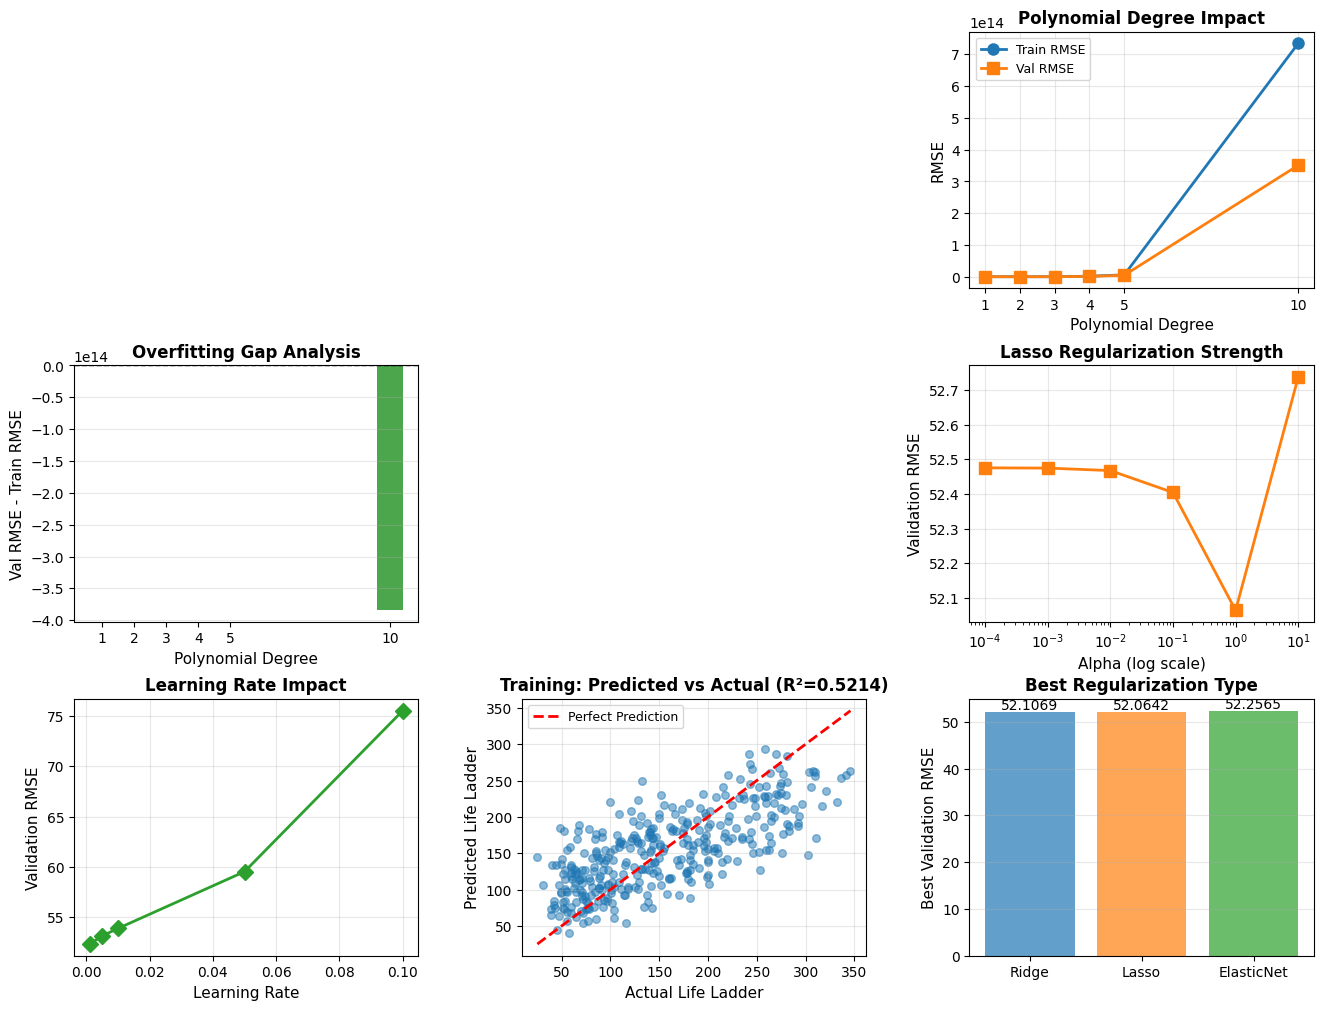


ANALYSIS COMPLETE ✓


In [333]:


print("\n" + "="*80)
print("10. VISUALIZATIONS")
print("="*80)

# Create comprehensive visualizations
fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Plot 1: Training and Validation Loss over Epochs
# ax1 = fig.add_subplot(gs[0, :2])
# ax1.plot(range(1, n_epochs + 1), train_losses_epoch, label='Training RMSE', linewidth=2, color='#1f77b4')
# ax1.plot(range(1, n_epochs + 1), val_losses_epoch, label='Validation RMSE', linewidth=2, color='#ff7f0e')
# ax1.set_xlabel('Epoch', fontsize=11)
# ax1.set_ylabel('RMSE', fontsize=11)
# ax1.set_title(f'Training/Validation Loss - {best_config["type"]} (α={best_config["alpha"]}, degree={best_val_degree})', 
#               fontsize=12, fontweight='bold')
# ax1.legend(fontsize=10)
# ax1.grid(True, alpha=0.3)

# Plot 2: Polynomial Degree Impact
ax2 = fig.add_subplot(gs[0, 2])
degrees_list = list(degree_results.keys())
train_rmses = [degree_results[d]['train_rmse'] for d in degrees_list]
val_rmses = [degree_results[d]['val_rmse'] for d in degrees_list]
ax2.plot(degrees_list, train_rmses, 'o-', label='Train RMSE', linewidth=2, markersize=8)
ax2.plot(degrees_list, val_rmses, 's-', label='Val RMSE', linewidth=2, markersize=8)
ax2.set_xlabel('Polynomial Degree', fontsize=11)
ax2.set_ylabel('RMSE', fontsize=11)
ax2.set_title('Polynomial Degree Impact', fontsize=12, fontweight='bold')
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3)
ax2.set_xticks(degrees_list)

# Plot 3: Overfitting Analysis (Gap)
ax3 = fig.add_subplot(gs[1, 0])
gaps = [degree_results[d]['val_rmse'] - degree_results[d]['train_rmse'] for d in degrees_list]
colors_gap = ['green' if g < 0.05 else 'orange' if g < 0.15 else 'red' for g in gaps]
bars = ax3.bar(degrees_list, gaps, color=colors_gap, alpha=0.7)
ax3.axhline(y=0, color='black', linestyle='--', linewidth=1)
ax3.set_xlabel('Polynomial Degree', fontsize=11)
ax3.set_ylabel('Val RMSE - Train RMSE', fontsize=11)
ax3.set_title('Overfitting Gap Analysis', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='y')
ax3.set_xticks(degrees_list)


# Plot 5: Regularization Comparison (Lasso)
ax5 = fig.add_subplot(gs[1, 2])
lasso_exps = [e for e in regularization_experiments if e['type'] == 'Lasso']
alphas_lasso = [e['alpha'] for e in lasso_exps]
val_rmses_lasso = [e['val_rmse'] for e in lasso_exps]
ax5.semilogx(alphas_lasso, val_rmses_lasso, 's-', linewidth=2, markersize=8, color='#ff7f0e')
ax5.set_xlabel('Alpha (log scale)', fontsize=11)
ax5.set_ylabel('Validation RMSE', fontsize=11)
ax5.set_title('Lasso Regularization Strength', fontsize=12, fontweight='bold')
ax5.grid(True, alpha=0.3)

# Plot 6: Learning Rate Impact
ax6 = fig.add_subplot(gs[2, 0])
lrs = [r['lr'] for r in lr_results]
val_rmses_lr = [r['val_rmse'] for r in lr_results]
ax6.plot(lrs, val_rmses_lr, 'D-', linewidth=2, markersize=8, color='#2ca02c')
ax6.set_xlabel('Learning Rate', fontsize=11)
ax6.set_ylabel('Validation RMSE', fontsize=11)
ax6.set_title('Learning Rate Impact', fontsize=12, fontweight='bold')
ax6.grid(True, alpha=0.3)

# Plot 7: Predicted vs Actual (Training)
ax7 = fig.add_subplot(gs[2, 1])
ax7.scatter(y_full, y_pred_train_final, alpha=0.5, s=30, color='#1f77b4')
min_val = min(y_full.min(), y_pred_train_final.min())
max_val = max(y_full.max(), y_pred_train_final.max())
ax7.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
ax7.set_xlabel('Actual Life Ladder', fontsize=11)
ax7.set_ylabel('Predicted Life Ladder', fontsize=11)
ax7.set_title(f'Training: Predicted vs Actual (R²={final_train_r2:.4f})', fontsize=12, fontweight='bold')
ax7.legend(fontsize=9)
ax7.grid(True, alpha=0.3)

# Plot 8: All Regularization Types Comparison
ax8 = fig.add_subplot(gs[2, 2])
ridge_best = min([e for e in regularization_experiments if e['type'] == 'Ridge'], key=lambda x: x['val_rmse'])
lasso_best = min([e for e in regularization_experiments if e['type'] == 'Lasso'], key=lambda x: x['val_rmse'])
elastic_best = min([e for e in regularization_experiments if e['type'] == 'ElasticNet'], key=lambda x: x['val_rmse'])

reg_types = ['Ridge', 'Lasso', 'ElasticNet']
best_rmses = [ridge_best['val_rmse'], lasso_best['val_rmse'], elastic_best['val_rmse']]
colors_reg = ['#1f77b4', '#ff7f0e', '#2ca02c']
bars = ax8.bar(reg_types, best_rmses, color=colors_reg, alpha=0.7)
ax8.set_ylabel('Best Validation RMSE', fontsize=11)
ax8.set_title('Best Regularization Type', fontsize=12, fontweight='bold')
ax8.grid(True, alpha=0.3, axis='y')
for i, (bar, rmse) in enumerate(zip(bars, best_rmses)):
    ax8.text(i, rmse, f'{rmse:.4f}', ha='center', va='bottom', fontsize=10)

plt.savefig('polynomial_regression_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*80)
print("ANALYSIS COMPLETE ✓")
print("="*80)







In [334]:
print("="*80)
print(f"""
Random Seed: 42
Polynomial Degree: 3
Regularization: {best_config['type']}
Alpha: 2.5
Learning Rate Schedule: invscaling
Initial Learning Rate (eta0): 0.01
Max Iterations: 12
Tolerance: 1e-3
This configuration can be used to reproduce the exact results.
""")
print("="*80)


Random Seed: 42
Polynomial Degree: 3
Regularization: Lasso
Alpha: 2.5
Learning Rate Schedule: invscaling
Initial Learning Rate (eta0): 0.01
Max Iterations: 12
Tolerance: 1e-3
This configuration can be used to reproduce the exact results.

